In [1]:
import  os
import  cv2

import  numpy               as np
import  matplotlib.pyplot   as plt

from    sklearn.metrics     import ConfusionMatrixDisplay

In [2]:
path        = 'C:\\Users\\User\\Documents\\MachineLearningTA\\ML_HW1\\Data\\image'
os.chdir(path=path)
list_dir    = os.listdir()

the image : j44.jpg was mispredicted into being Red
the image : j45.jpg was mispredicted into being Red
the image : s24.jpg was mispredicted into being Blue

number of TP: 39
number of TN: 40
number of FP: 2
number of FN: 1

Sensitivity(Recall)       = 0.975
Specifity                 = 0.9523809523809523
Percision                 = 0.9512195121951219
Negative Predictive Value = 0.975609756097561
Accuracy                  = 0.9634146341463414



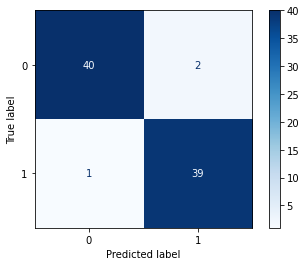

In [7]:
TP      = 0
FP      = 0
FN      = 0
TN      = 0

images_list = [0, 0, 0]

for file_name in list_dir:
  if(file_name.endswith(".jpg")):
    image_address = path+"/"+str(file_name)
    images_list[0] = str(file_name)
    current_image = cv2.imread(image_address)
    for i in range(current_image.shape[0]):
      for j in range(current_image.shape[1]):
        B,G,R = current_image[i,j]
    B,G,R=np.mean(np.mean(current_image,axis=1),axis=0)
    if(B>G):
      if (file_name.startswith('j')):
        FP+=1 #predicted : Blue (sea)    , actual : Green (jungle)
        print(f'the image : {file_name} was mispredicted into being Blue')
      else:
        TP+=1 #predicted : Blue (sea)    , actual : Blue (sea)
    else:
      if (file_name.startswith('j')):
        TN+=1 #predicted : Green (jungle), actual : Green (jungle)
      elif (file_name.startswith('s')):
        FN+=1 #predicted : Green (jungle), actual : Blue (sea)
        print(f'the image : {file_name} was mispredicted into being Green')
print()

print(f'number of TP: {TP}')
print(f'number of TN: {TN}')
print(f'number of FP: {FP}')
print(f'number of FN: {FN}')
print()

print(f'Sensitivity(Recall)       = {TP/(TP+FN)}'             )
print(f'Specifity                 = {TN/(TN+FP)}'             )
print(f'Percision                 = {TP/(TP+FP)}'             )
print(f'Negative Predictive Value = {TN/(TN+FN)}'             )
print(f'Accuracy                  = {(TP + TN)/(TP+TN+FP+FN)}')
print()

CM = np.array([TN, FP, FN, TP])

disp = ConfusionMatrixDisplay(CM.reshape(2,2))
disp.plot(cmap='Blues')
plt.show()